# Logistic Regression for Predicting Diabetes in Woman

A logistic regression machine learning model will be implemented to determine if people have diabetes give certain characteristics. The dataset is taken from the "National Institute of Diabetes & Digestive & Kidney Diseases" in the USA. The patients in the data are females of Prima Indian Heritage of age 21 and older.

In [1]:
#importing the necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
#creating the dataframe

diabetes = pd.read_csv("diabetes2.csv")


# The Data

The data contains the following columns:

- Pregnancies: Number of times pregnant.
- Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test.
- BloodPressure: Diastolic Blood Pressure (mm Hg).
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index (weight in kg/(height in m)^2).
- DiabetesPedigreeFunction: This function tells you the likelihood of diabetes based on family history.
- Age: Age (years)
- Outcome: Class variable, 0 (no disease), or 1 (have the disease).

In [27]:
#looking at the top 5 rows in the dataframe

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Looking at the info gives important insights such as the number of total entries (rows), the number of columns, and the number of missing values in each column. It looks like there are no missing values in any of the columns since the number of non-null values are equal to the number of entries.

In [26]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
#Checking again to make sure no values are missing.

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis Trends

Before applying the logistic regression model, I will apply some exploratory data visualization to get a better understanding of the dataset with regards to the diagnosis of diabetes. There are many factors that can lead to people having diabetes such as insulin, glucose and blood pressure levels and these will be explored.

To begin, I will simply create a count plot to see how many people were tested to have the disease vs. how many do not have the disease.

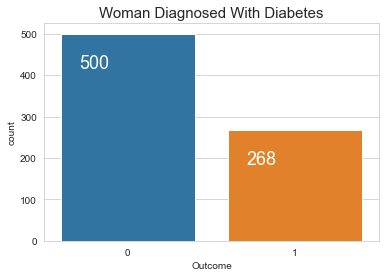

In [219]:
sns.set_style("whitegrid")
Cnt = sns.countplot(data = diabetes, x = "Outcome")
Cnt.set_title("Woman Diagnosed With Diabetes", fontsize = 15)

# to display the numbers on the graphs
for bar in Cnt.patches:
    Cnt.annotate(f'\n{bar.get_height()}', (bar.get_x()+0.2, bar.get_height()), va='top', ha='center', color='white', size=18)

Majority of the females in the study tend to not have the disease, and the remaining minority have the disease.

Now, I will take a glance at the blood pressure counts to see the distribution. A normal diastolic blood pressure is between 70-80 (mm Hg) and it seems that a large portion of woman lie between that range.

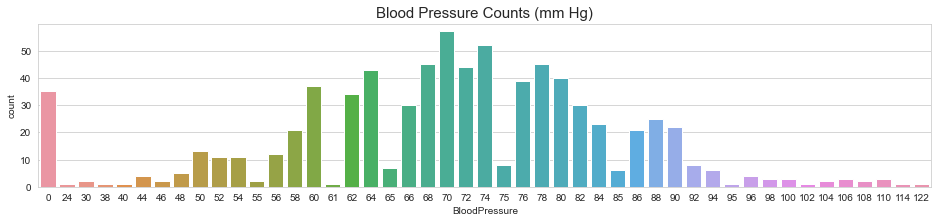

In [55]:
plt.figure(figsize = (16,3))
bar = sns.countplot(data = diabetes, x = "BloodPressure").set_title("Blood Pressure Counts (mm Hg)", fontsize = 15)


It can be seen that some blood pressure values are zero which are not real clinical values. These values will be estimated and replaced with the mean values in the data cleaning section.

Now I will attemp to visualize the relationship between the mean blood pressure of the woman with diabetes vs. the mean blood pressure of those without.

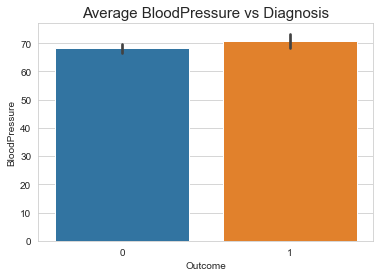

In [220]:
bar = sns.barplot(x = "Outcome", y = "BloodPressure", data = diabetes)
bar.set_title("Average BloodPressure vs Diagnosis", fontsize = 15)


It can be seen that the female patients who have diabetes have a slighly higher blood pressure.

Next, I will look at the glucose concentration of the patients as well as the insulin levels. Diabetes occurs from an increase in blood sugar levels because your body either can't produce insulin, or can't use the insulin properly that your body produces. When glucose is in the blood, it signals the pancrease to form insulin, which is a hormone that helps transport the glucose from the blood to many cells around the body. If insulin is not functioning due to high concentrations (type 2 diabetes), or is not produced (type 1 diabetes), the blood sugar levels will be high as the aborption of glucose from the blood is not functioning.

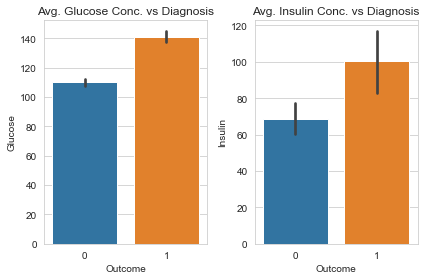

In [222]:
fig, axes = plt.subplots(1,2)

bar2 = sns.barplot(x = "Outcome", y = "Glucose", data = diabetes, ax = axes[0])
bar2.set_title("Avg. Glucose Conc. vs Diagnosis")

bar3 = sns.barplot(x = "Outcome", y = "Insulin", data = diabetes, ax= axes[1])
bar3.set_title("Avg. Insulin Conc. vs Diagnosis")
plt.tight_layout()

The barplot confirms that patients who have diabetes have considerably higher plasma glucose concentrations and insulin levels than those without.

Another important category to look at is the body mass index (BMI) and how this has an impact on diabetes. It is defined as the weight of the body divded by the height (in meters) squared. It is used as a method to categorize weight (e.g underweight, overweight, healthyweight.) An increase in weight has been known to be a cause of diabetes and the following data will be used to shown this.

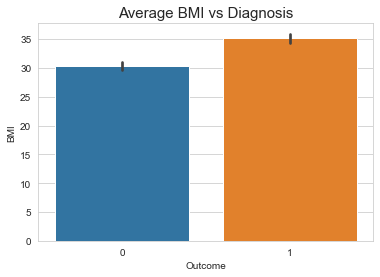

In [221]:
bar4 =sns.barplot(x = "Outcome", y = "BMI", data = diabetes)
bar4.set_title("Average BMI vs Diagnosis", fontsize = 15)

The barplot shows that the woman diagnosed with diabetes have a higher BMI index (around 35) than those without. The average BMI index for woman with diabetes shows that they have type 2 obesity (BMI index from 35-39.9). The average BMI index for woman that were not diagnosed with obesity shows that they have type 1 obesity (BMI index from 30-34.9)

To continue, I will search for correlations for every category and plot this using a heatmap to see if I can find any more relevent information to compare to the outcome variable.

Text(0.5, 1.0, 'Heatmap of all the Correlations')

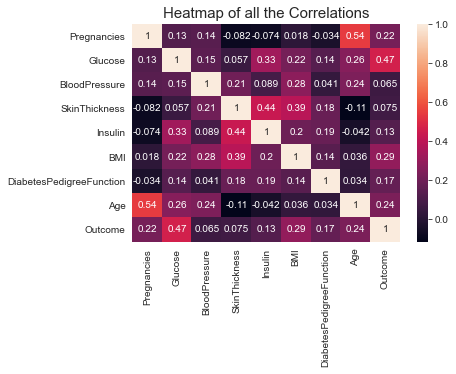

In [109]:
correl = diabetes.corr()
sns.heatmap(correl, annot = True).set_title("Heatmap of all the Correlations", fontsize = 15)

Note that in a heatmap, a larger value means more correlation between the two columns. In this case, a lighter color represents a higher correlation. It is shown that glucose has a high correlation with the outcome of diabetes as explained above, as well as the BMI index. One can also see that age and pregnancies have a high correlation which makes sense because the more children a woman has, the older they will be.

# Data Processing & Cleaning

As mentioned above, there are no missing values in any category in the dataframe. However, there are zero values in multiple columns which are not good clinical representation values. I will further explore how many zero values there are in each column.

In [130]:
for i in diabetes.columns:
    print (f"Number of zero values for {i} is:", diabetes[i].isin([0]).sum())

Number of zero values for Pregnancies is: 111
Number of zero values for Glucose is: 5
Number of zero values for BloodPressure is: 35
Number of zero values for SkinThickness is: 227
Number of zero values for Insulin is: 374
Number of zero values for BMI is: 11
Number of zero values for DiabetesPedigreeFunction is: 0
Number of zero values for Age is: 0
Number of zero values for Outcome is: 500


The following categories have zero values: Pregnanices, Glucose, BloodPressure, SkinThickness, Insulin, BMI and outcome. However, a value of zero for pregnancies is a real value, since the woman had no children. For outcome, the value of zero is also a real value, indicating that the woman does not have diabetes. The rest of the columns should not have zero values as they are not real clinical values. Each zero value will be replaced with the mean value for each column.

In [132]:
#making a copy of the dataframe so we don't work with the actual data.

diabetes_processed = diabetes.copy()

In [139]:
#only elements 1 through 6 (not including 6) will be used.
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [136]:
#updating zero values in the needed columns to the mean values.

for i in diabetes.columns[1:6]:
    diabetes_processed[i] = diabetes_processed[i].replace(0, diabetes[i].mean())

In [137]:
#checking the head the of the updated dataframe.
diabetes_processed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


As you can see from the newly updated dataframe, the first 3 values for insulin are no longer zero as they were in the old dataframe, and have been changed with the mean values. I will double check to see if the update was done to the rest of the columns.

In [140]:
for i in diabetes_processed.columns:
    print (f"Number of zero values for {i} is:", diabetes_processed[i].isin([0]).sum())

Number of zero values for Pregnancies is: 111
Number of zero values for Glucose is: 0
Number of zero values for BloodPressure is: 0
Number of zero values for SkinThickness is: 0
Number of zero values for Insulin is: 0
Number of zero values for BMI is: 0
Number of zero values for DiabetesPedigreeFunction is: 0
Number of zero values for Age is: 0
Number of zero values for Outcome is: 500


The Glucose, BloodPressure, SkinThickness, Insulin, and BMI no longer have zero values and the data cleaning is complete.

A baseline model will be used to classify the accuracy of the logistic reggresion model to classify patients who no not have diabetes vs those who do. A good baseline model always chooses the majority group (the ZeroR classifier), which in machine learning is usually the patients who tested negative, or do not have the disease.

In [7]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

As shown above and in the data exploration section, the majority classifer here is 0, or people who no not have the diabetes. Now, the baseline accuracy will be computed.

In [185]:
#baseline accuracy

base_accuracy = 500/(500 + 268)
print(f"The baseline accuracy is: {base_accuracy}")

The baselin accuracy is: 0.6510416666666666


Thus, for the model to be accurate, it needs to beat the baseline accuracy.

# Training Model and Predicitions

I will begin by splitting the data into a training set and a test set. The data will be split into the X array that has all the columns that the model will train on, minus the target variable column (the outcome). The y array will be the 'Outcome' column.

## Train Test Split

In [191]:
from sklearn.model_selection import train_test_split

In [148]:
#Setting the variables.

X = diabetes_processed.drop('Outcome', axis=1)
y = diabetes_processed['Outcome']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Fitting and Predicting the Data

In [192]:
from sklearn.linear_model import LogisticRegression

In [216]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [157]:
predictions = logmodel.predict(X_test)

## Model Evaluation

In [223]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [207]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       150
           1       0.74      0.59      0.66        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [208]:
confusion_matrix(y_test,predictions)

array([[133,  17],
       [ 33,  48]])

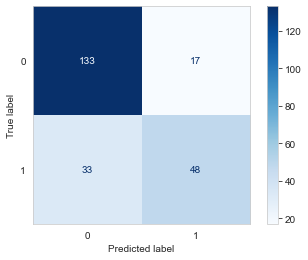

In [213]:
#displaying the confusing matrix as a plot

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logmodel, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False) #removes the gridlines

In [189]:
accuracy = accuracy_score(y_test,predictions)
print(f"The accuracy is: {accuracy}")

The accuracy is: 0.7835497835497836


As shown, the model has an accuracy score of 0.78, which is greater than the baseline accuracy of 0.65 meaning the model is adequately effective. The accuracy score is the true positive (bottom right) + true negative (top left) / ( true positive + true negative + false positive (top right) + false negative (bottom left). Thus, the model can predict that a person DOES NOT (the majority classifer) have diabetes with an accuracy of 78%. However, if I want the model to tell me how many positive cases it was able to be predict correctly, I need to look at the recall score.

The recall metric is very important in medical studies where positive cases need to be detected. You do not want a person who has the diesease being told that they do not have it. The recall score tells us that 59% of the positive cases were succsesfully predicted by the model. This means that this model is not very good at predicting if someone is testing postive, but it's relatively accurate (89%) at predicting people who test negative.